In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from modelbase.ode import Simulator
from modelbase.ode import Model

from model import model as m

from y0_new_values import y0dark12, y0dark2, y0high2

Could not find GLIMDA.


[1.70731708e+01 2.24895130e-04 4.99994728e+00 1.08333452e-07
 6.24306242e-08 5.03857196e-05 9.00923284e-01 9.00000000e-01
 9.00000000e-01 4.28094237e-09 5.64628407e-20 8.91538027e-13
 1.96138364e-11 1.24154015e-22 3.65029175e-01 8.39567102e-01
 4.86948919e-02 1.50791282e-17 4.72289337e-01 5.91385141e-08
 4.62249441e-07 7.74267814e-07 4.20799865e-13 3.09707126e-07]
[2.89244140e-07 9.68365876e-06 4.87913257e+00 1.08214533e-07
 2.38752041e-01 5.03738626e-05 2.70001937e-01 4.50000000e-01
 4.50000000e-01 8.65672006e-09 1.14051280e-19 2.56881509e-12
 5.65139314e-11 1.03068480e-21 3.65049050e-01 8.39612815e-01
 4.86975433e-02 7.37424772e-17 4.72436941e-01 1.00374402e-07
 7.84767316e-07 1.31448526e-06 8.48663816e-13 5.25794102e-07]
[1.70731706e+01 2.48774022e-04 4.99993372e+00 1.08411063e-07
 9.91826039e-08 5.03934524e-05 7.41980550e-01 9.99994038e-01
 5.87630605e-01 5.77128862e-09 7.61739634e-20 1.20163803e-12
 2.64360364e-11 2.25542579e-22 3.65029177e-01 8.39567106e-01
 4.86948922e-02 2.3595

No handles with labels found to put in legend.
No handles with labels found to put in legend.


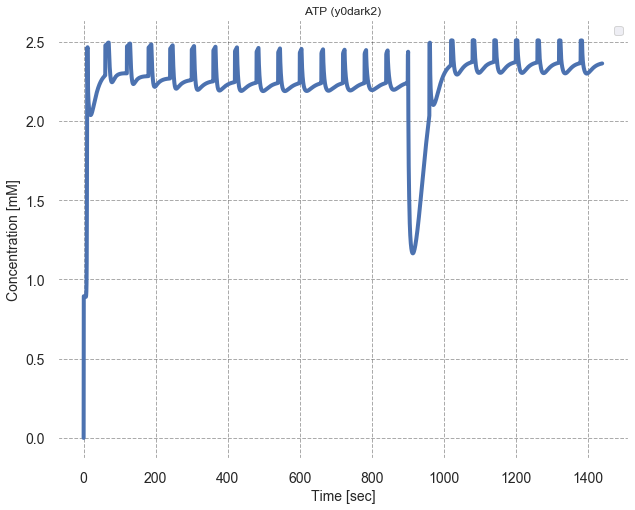

In [14]:
Tmax =1400
dt = 60
pulse=0.8
Tdark = 900

t = 0
s = Simulator(m)
s.update_parameter("pfd", 100)
s.initialise(y0dark2)
s.update_parameter("ox", False)
while t < Tmax:
    if t%dt == 0:
        s.update_parameter("pfd", 5000)
        s.simulate(t+pulse, steps=10000, **{'atol':1.e-12})
    else:
        if t < Tdark:
            s.update_parameter("pfd", 100)
        else:
            s.update_parameter("pfd", 30.0)
        s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-12})
    t = s.get_time()[-1]

s.plot_selection('PQ')
#s.plot_flux_selection('PQ')

plt.title("Plastoquinone (y0dark2)")
plt.xlabel("Time [sec]")
plt.ylabel("Concentration [mM]")
plt.legend()
#plt.show()

s.plot_selection('ATP')
#s.plot_flux_selection('ATP')

plt.title("ATP (y0dark2)")
plt.xlabel("Time [sec]")
plt.ylabel("Concentration [mM]")
plt.legend()
plt.show()

In [2]:
light = [100, 200, 500, 750, 1000, 1500, 2000]

No handles with labels found to put in legend.


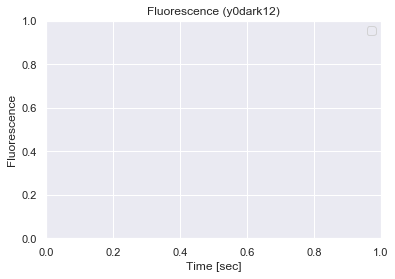

In [3]:
y1 = np.zeros([20001,7])
counter = 0

for x in light:
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0dark12)
    s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    s.simulate(900, steps=10000, **{'atol':1.e-12})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-12}) 
    #plt.plot(s.get_time(), s.get_variable("Fluo"), label= str(x))
    y1[:,counter] = s.get_variable("Fluo")
    counter = counter+1
    
plt.title("Fluorescence (y0dark12)")
plt.xlabel("Time [sec]")
plt.ylabel("Fluorescence")
plt.legend()
#plt.show()

No handles with labels found to put in legend.


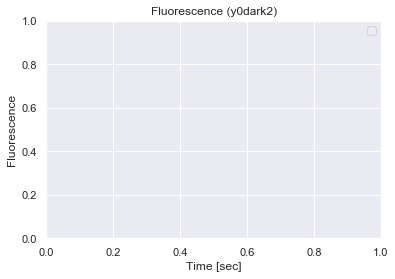

In [4]:
y3 = np.zeros([20001,7])
counter = 0

for x in light:
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0dark2)
    s.simulate(900, steps=10000, **{'atol':1.e-12})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-12})
    #plt.plot(s.get_time(), s.get_variable("Fluo"), label= str(x))
    y3[:,counter] = s.get_variable("Fluo")
    counter = counter+1

plt.title("Fluorescence (y0dark2)")
plt.xlabel("Time [sec]")
plt.ylabel("Fluorescence")
plt.legend()
#plt.show()

No handles with labels found to put in legend.


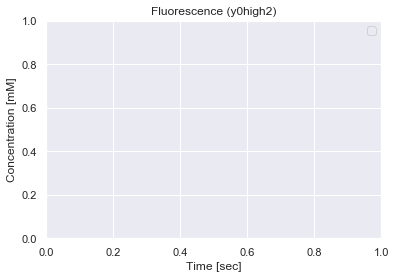

In [6]:
y5 = np.zeros([20001,7])
counter = 0

for x in light:
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0high2)
    s.update_parameters({"kProtonationL": 0.0096, "kDeprotonation": 0.0096, "kDeepoxV": 0.0024, "kEpoxZ": 0.00024})
    s.simulate(900, steps=10000, **{'atol':1.e-12})
    s.update_parameter("pfd", 30.0)
    s.simulate(1400, steps=10000, **{'atol':1.e-12})
    #plt.plot(s.get_time(), s.get_variable("Fluo"), label= str(x))
    y5[:,counter] = s.get_variable("Fluo")
    counter = counter+1

plt.title("Fluorescence (y0high2)")
plt.xlabel("Time [sec]")
plt.ylabel("Concentration [mM]")
plt.legend()
#plt.show()

# with PAM

No handles with labels found to put in legend.


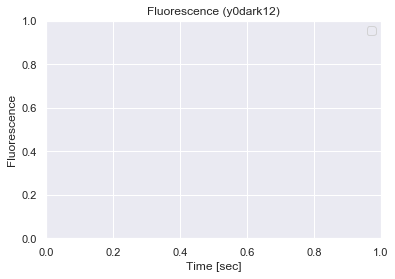

In [7]:
Tmax =1400
dt = 60
pulse=0.8
Tdark = 900

y2 = np.zeros([480001,7])
counter = 0

for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0dark12)
    s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-16})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-16})
        t = s.get_time()[-1]
    #plt.plot(s.get_time(), s.get_variable("Fluo"), label= str(x))
    y2[:,counter] = s.get_variable("Fluo")
    counter = counter+1
    
plt.title("Fluorescence (y0dark12)")
plt.xlabel("Time [sec]")
plt.ylabel("Fluorescence")
plt.legend()
#plt.show()

No handles with labels found to put in legend.


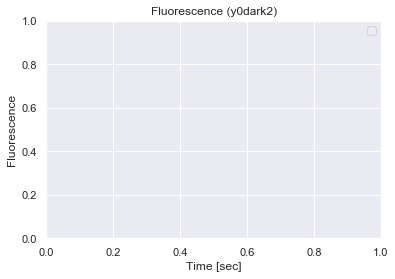

In [8]:
y4 = np.zeros([480001,7])
counter = 0

for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0dark2)
    #s.update_parameters({"kProtonationL": 0.0, "kDeprotonation": 0.0, "kDeepoxV": 0.0, "kEpoxZ": 0.0})
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-12})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-12})
        t = s.get_time()[-1]
    #plt.plot(s.get_time(), s.get_variable("Fluo"), label= str(x))
    y4[:,counter] = s.get_variable("Fluo")
    counter = counter+1

plt.title("Fluorescence (y0dark2)")
plt.xlabel("Time [sec]")
plt.ylabel("Fluorescence")
plt.legend()
#plt.show()

No handles with labels found to put in legend.


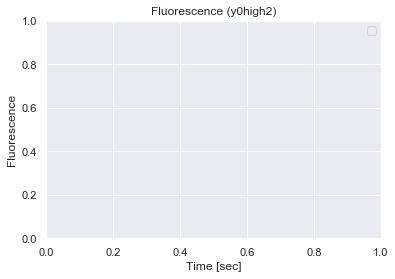

In [9]:
y6 = np.zeros([480001,7])
counter = 0

for x in light:
    t = 0
    s = Simulator(m)
    s.update_parameter("pfd", x)
    s.initialise(y0high2)
    s.update_parameters({"kProtonationL": 0.0096, "kDeprotonation": 0.0096, "kDeepoxV": 0.0024, "kEpoxZ": 0.00024})
    while t < Tmax:
        if t%dt == 0:
            s.update_parameter("pfd", 5000)
            s.simulate(t+pulse, steps=10000, **{'atol':1.e-14})
        else:
            if t < Tdark:
                s.update_parameter("pfd", x)
            else:
                s.update_parameter("pfd", 30.0)
            s.simulate(t+dt-pulse, steps=10000, **{'atol':1.e-14})
        t = s.get_time()[-1]
    #plt.plot(s.get_time(), s.get_variable("Fluo"), label= str(x))
    y6[:,counter] = s.get_variable("Fluo")
    counter = counter+1
    
plt.title("Fluorescence (y0high2)")
plt.xlabel("Time [sec]")
plt.ylabel("Fluorescence")
plt.legend()
#plt.show()

In [10]:
x1 = np.linspace(1, 1400, len(y1))
x2 = np.linspace(1, 1400, len(y2))
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2)

for i in range(7):
    ax1.plot(x1,y1[:,i], label=i)
    ax2.plot(x2,y2[:,i])
    ax3.plot(x1,y3[:,i])
    ax4.plot(x2,y4[:,i])
    ax5.plot(x1,y5[:,i])
    ax6.plot(x2,y6[:,i])
    
fig.tight_layout()